<a href="https://colab.research.google.com/github/jtao22/APCSA/blob/main/HABWeatherBalloon/HABDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
#import 
import pandas as pd 
import numpy as np
from google.colab import files 
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
files.upload()

Saving accelerometer.csv to accelerometer.csv
Saving aiq_quality.csv to aiq_quality.csv
Saving altimeter.csv to altimeter.csv
Saving co2.csv to co2.csv
Saving light.csv to light.csv
Saving load_cell.csv to load_cell.csv
Saving magnetometer.csv to magnetometer.csv
Saving mq9.csv to mq9.csv
Saving temphumiditybaro.csv to temphumiditybaro.csv
Saving uv.csv to uv.csv


In [81]:
altitudes = pd.read_csv('altimeter.csv')
temphumidity = pd.read_csv('temphumiditybaro.csv')

In [82]:
altitudes['altitude_m'] = altitudes['altitude_cm']/100


In [83]:
temphumidity['time'] = temphumidity['time_ms']/1000
temphumidity['pressure_kpa'] = temphumidity['pressure_pa']/1000
temphumidity.head(5)

,time_ms,temperature_c,humidity,pressure_pa,time,pressure_kpa
0,170,21.11,34.41,102279.24,0.170,102.27924
1,1191,21.11,34.39,102278.39,1.191,102.27839
2,2213,21.06,34.41,102281.36,2.213,102.28136
3,3234,21.03,34.44,102280.70,3.234,102.28070
4,4256,20.97,34.47,102277.03,4.256,102.27703


#Plotting the temperature and pressure for the whole flight 

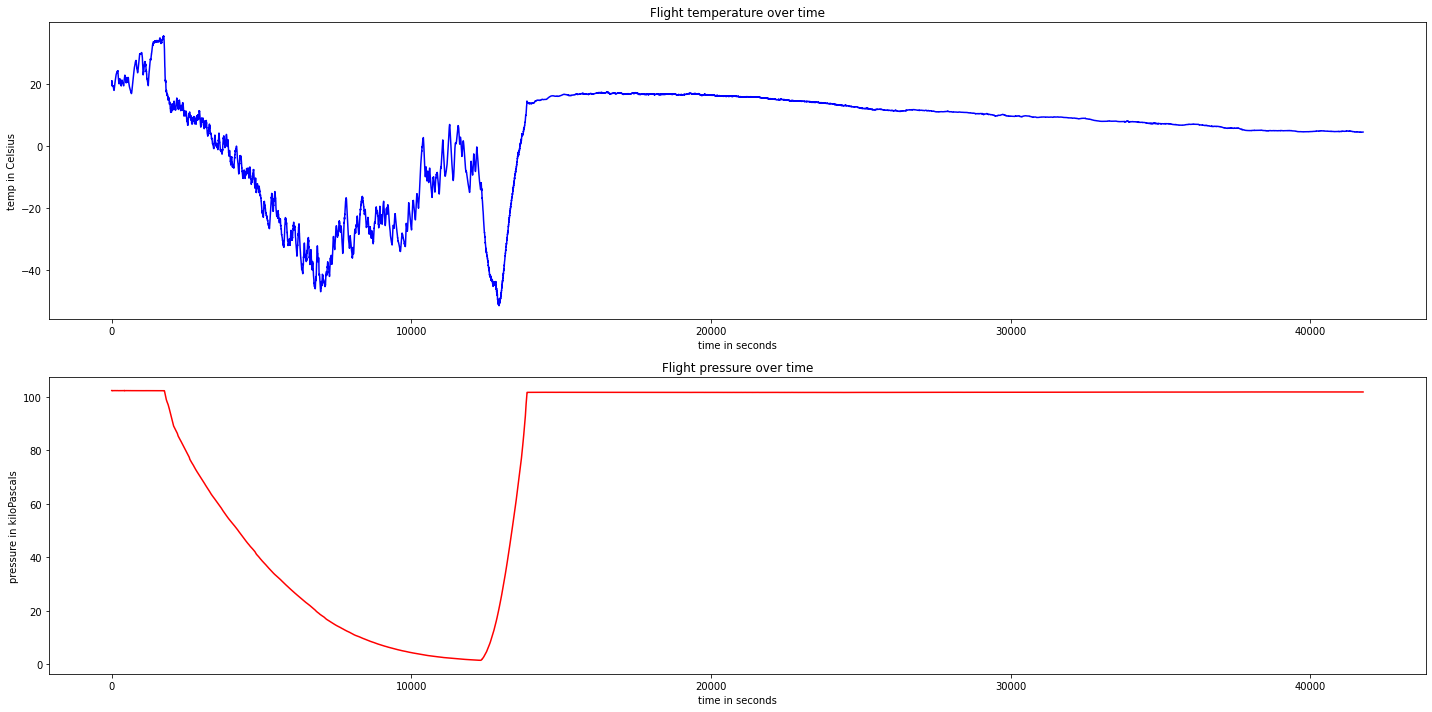

In [84]:
fig = plt.figure(figsize=(20,10))
tempplot = fig.add_subplot(2,1,1)
pressplot = fig.add_subplot(2,1,2)
sns.lineplot(x=temphumidity['time'], y = temphumidity['temperature_c'], ax = tempplot, color="blue")
sns.lineplot(x=temphumidity['time'], y = temphumidity['pressure_kpa'], ax = pressplot, color="red")
tempplot.set_ylabel("temp in Celsius")
tempplot.set_xlabel("time in seconds")
tempplot.set_title('Flight temperature over time')
pressplot.set_ylabel("pressure in kiloPascals")
pressplot.set_xlabel("time in seconds")
pressplot.set_title('Flight pressure over time')
fig.tight_layout()

#Finding the minimum and maximum values for both

In [85]:
print("Maximum temperature was: ", temphumidity['temperature_c'].max(), "degrees Celsius")
print("Minimum temperature was: ", temphumidity['temperature_c'].min(), "degrees Celsius")
print("Maximum pressure was: ", temphumidity['pressure_kpa'].max(), "kiloPascals")
print("Minimum pressure was: ", temphumidity['pressure_kpa'].min(), "kiloPascals")


Maximum temperature was:  35.56 degrees Celsius
Minimum temperature was:  -51.45 degrees Celsius
Maximum pressure was:  102.33702000000001 kiloPascals
Minimum pressure was:  1.4828299999999999 kiloPascals


#####Looking at the pressure graph, there appears to be a turning point at around 130000 seconds and there is a steady increase in pressure for around 10000 seconds. Finding the exact values below.

In [86]:
#finding the point of minimum pressure aka end of ascent/start of descent
endascent = temphumidity['pressure_kpa'].idxmin()
print(temphumidity.loc[1730:1780, 'pressure_kpa'])
startascent = 1742
print(temphumidity['time'][startascent], temphumidity['time'][endascent])

1730    102.26132
1731    102.25778
1732    102.26168
1733    102.25534
1734    102.26577
1735    102.25473
1736    102.25213
1737    102.23019
1738    102.20168
1739    102.16195
1740    102.11758
1741    102.07141
1742    102.03288
1743    101.97625
1744    101.92856
1745    101.88151
1746    101.83109
1747    101.78752
1748    101.73575
1749    101.68327
1750    101.63648
1751    101.58695
1752    101.52500
1753    101.47473
1754    101.41859
1755    101.34598
1756    101.29003
1757    101.22113
1758    101.14809
1759    101.07484
1760    101.01005
1761    100.94039
1762    100.87239
1763    100.80558
1764    100.74076
1765    100.67825
1766    100.62866
1767    100.56125
1768    100.51156
1769    100.45721
1770    100.39652
1771    100.33259
1772    100.27073
1773    100.21072
1774    100.14167
1775    100.08192
1776    100.02277
1777     99.97736
1778     99.93353
1779     99.87686
1780     99.84289
Name: pressure_kpa, dtype: float64
1761.063 12315.096


#####It appears that the pressure starts decreasing at t = 1761 seconds, so it is safe to assume the launch starts at around there. The minimum pressure is achieved at around 12315 seconds, so the total time of ascent is 12315.096-1761.063 = 10554.033 seconds

In [87]:
print(temphumidity.loc[13550:13600, 'pressure_kpa'])
enddescent = 13584
print(temphumidity['time'][endascent], temphumidity['time'][enddescent])

13550     96.18652
13551     96.34854
13552     96.55621
13553     96.63891
13554     96.91911
13555     97.10913
13556     97.27220
13557     97.42529
13558     97.58136
13559     97.82855
13560     98.00081
13561     98.17158
13562     98.32755
13563     98.51242
13564     98.63759
13565     98.80998
13566     98.88605
13567     99.10867
13568     99.23895
13569     99.33944
13570     99.49654
13571     99.64838
13572     99.72480
13573     99.94167
13574    100.03461
13575    100.29817
13576    100.36594
13577    100.57451
13578    100.76030
13579    100.85605
13580    101.03452
13581    101.16941
13582    101.35615
13583    101.49403
13584    101.62832
13585    101.63067
13586    101.63222
13587    101.63375
13588    101.62817
13589    101.63619
13590    101.63533
13591    101.63555
13592    101.63969
13593    101.64011
13594    101.63324
13595    101.63947
13596    101.63955
13597    101.63669
13598    101.63323
13599    101.64027
13600    101.64253
Name: pressure_kpa, dtype: floa

#####It looks as though at around index 13584 the change in pressure levels off, indicating that the balloon has hit the ground. The total time of descent is therefore 13855.262-12315.096 = 1540.166 seconds.

In [88]:
magnetometer = pd.read_csv('magnetometer.csv')
magnetometer['time'] = magnetometer['time_ms']/1000
magnetometer.head(5)

,time_ms,X,Y,Z,time
0,504,651,428,-1400,0.504
1,636,658,453,-1400,0.636
2,755,677,456,-1378,0.755
3,875,623,428,-1393,0.875
4,995,616,426,-1373,0.995


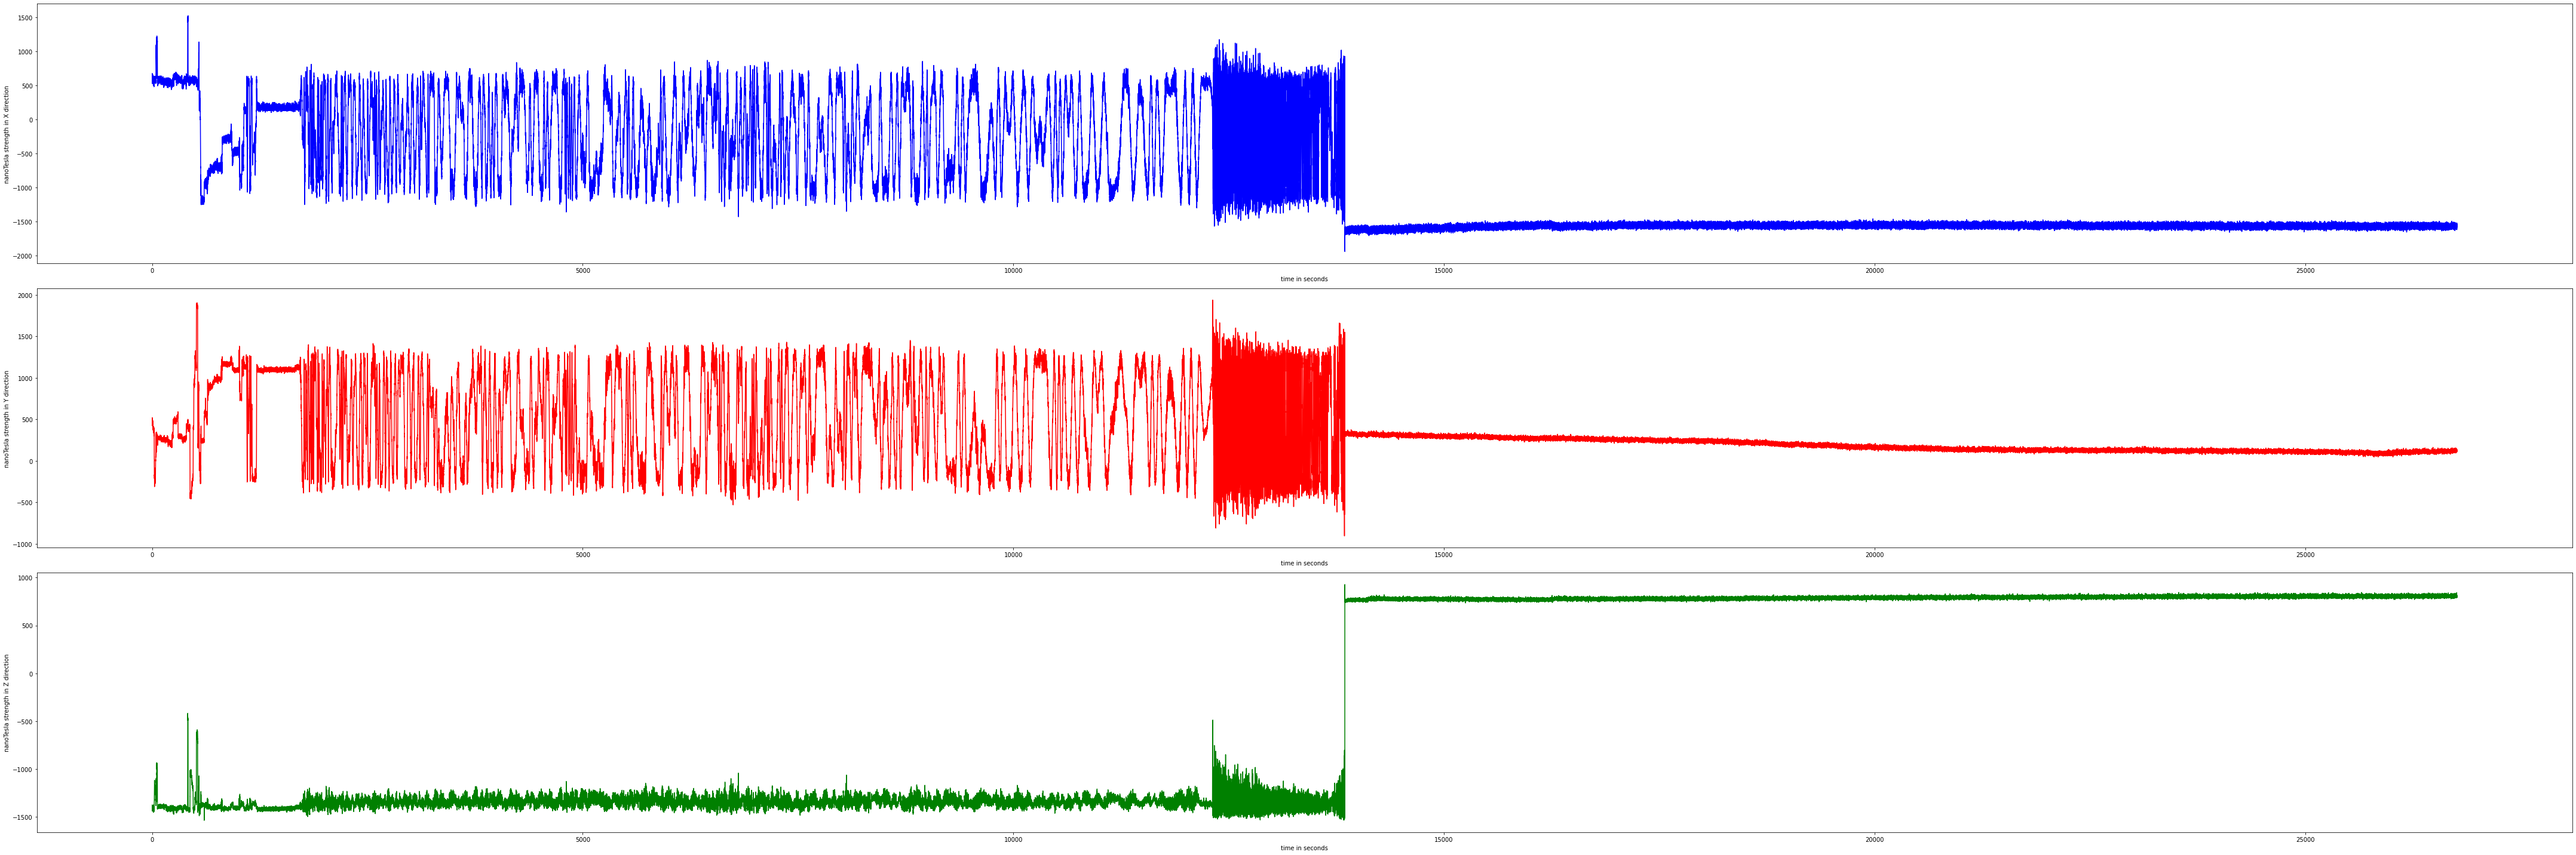

In [91]:
fig = plt.figure(figsize=(60,20))
xplot = fig.add_subplot(3,1,1)
yplot = fig.add_subplot(3,1,2)
zplot = fig.add_subplot(3,1,3)
sns.lineplot(x=magnetometer['time'], y = magnetometer['X'], ax = xplot, color="blue")
sns.lineplot(x=magnetometer['time'], y = magnetometer['Y'], ax = yplot, color="red")
sns.lineplot(x=magnetometer['time'], y = magnetometer['Z'], ax = zplot, color="green")
xplot.set_ylabel("nanoTesla strength in X direction")
xplot.set_xlabel("time in seconds")
yplot.set_ylabel("nanoTesla strength in Y direction")
yplot.set_xlabel("time in seconds")
zplot.set_ylabel("nanoTesla strength in Z direction")
zplot.set_xlabel("time in seconds")
fig.tight_layout()

#Plotting MQ9 Data

In [93]:
mq9 = pd.read_csv('mq9.csv')
mq9['time'] = mq9['time_ms']/1000
mq9.head(5)

,time,time_ms,mq9_sensor
0,0.452,452,229.80
1,1.044,1044,262.42
2,1.624,1624,291.40
3,2.203,2203,1.55
4,2.782,2782,1.62


In [118]:
#converting time value from altitude into seconds value 
altitudes['date-time'] = pd.to_datetime(altitudes['time'])
for i in range(9706):
  altitudes['time_s'][i] = (altitudes['date-time'][i]-datetime(2021,2,22)).total_seconds()-28800
altitudes.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,time,altitude_cm,pressure_pa,temperature_c,altitude_m,date-time,time_s
0,2021-02-22 08:00:00,10179.0,100107.0,22.84,101.79,2021-02-22 08:00:00,0
1,2021-02-22 08:00:01,10120.0,100120.0,22.83,101.20,2021-02-22 08:00:01,1
2,2021-02-22 08:00:02,10154.0,100110.0,22.80,101.54,2021-02-22 08:00:02,2
3,2021-02-22 08:00:03,9382.0,100197.0,22.81,93.82,2021-02-22 08:00:03,3
4,2021-02-22 08:00:04,9038.0,100203.0,22.78,90.38,2021-02-22 08:00:04,4


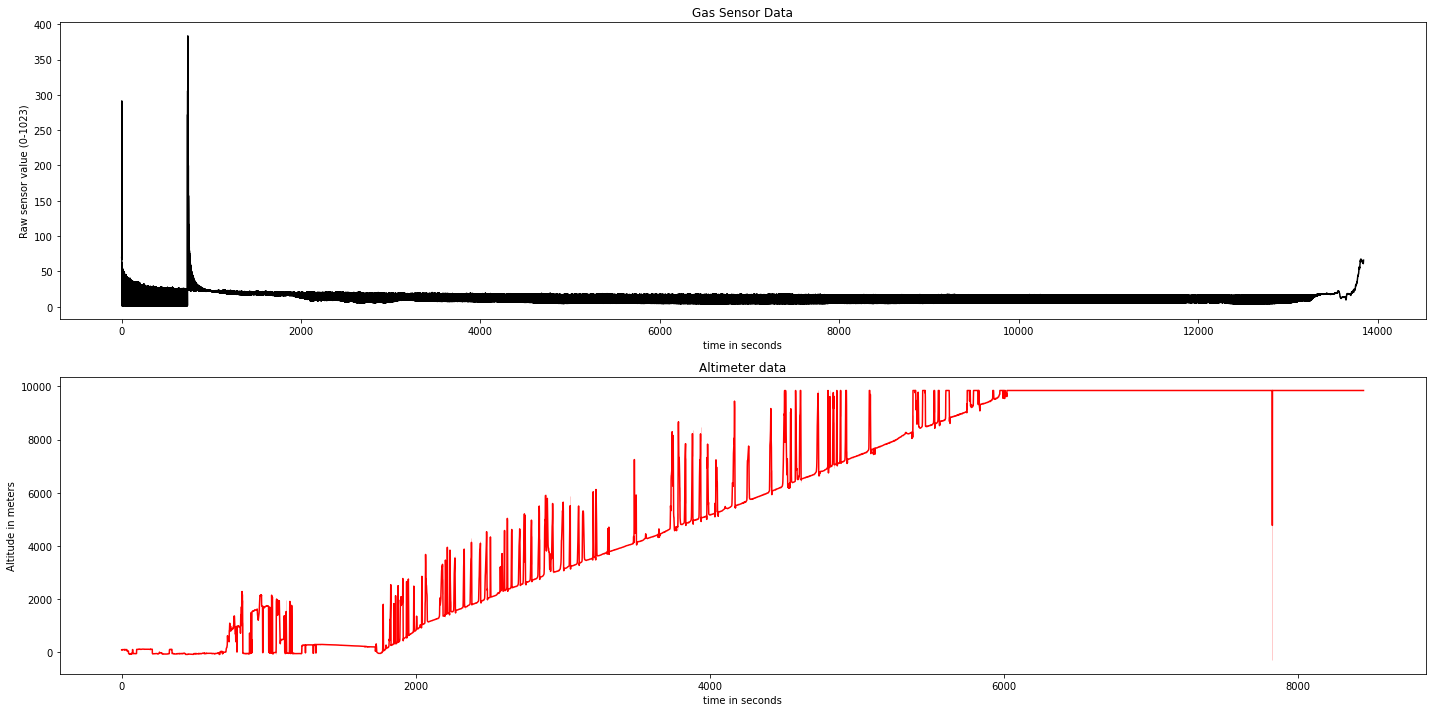

In [121]:
fig = plt.figure(figsize=(20,10))
mq9plot = fig.add_subplot(2,1,1)
altplot = fig.add_subplot(2,1,2)
sns.lineplot(x=mq9['time'], y = mq9['mq9_sensor'], ax = mq9plot, color="black")
sns.lineplot(x=altitudes['time_s'], y = altitudes['altitude_m'], ax = altplot, color="red")
mq9plot.set_ylabel("Raw sensor value (0-1023)")
mq9plot.set_xlabel("time in seconds")
mq9plot.set_title("Gas Sensor Data")
altplot.set_ylabel("Altitude in meters")
altplot.set_xlabel("time in seconds")
altplot.set_title("Altimeter data")
fig.tight_layout()

#####Altimeter data seems quite unreliable, so we will disregard it. The strange thing I noticed was the bimodality of peaks in the gas sensor data.

#Plotting light and temperature data

In [123]:
light = pd.read_csv('light.csv')
light['time'] = light['time_ms']/1000
light.head(5)

,time_ms,light_sensor,time
0,189,623,0.189
1,708,623,0.708
2,1228,623,1.228
3,1748,621,1.748
4,2268,623,2.268


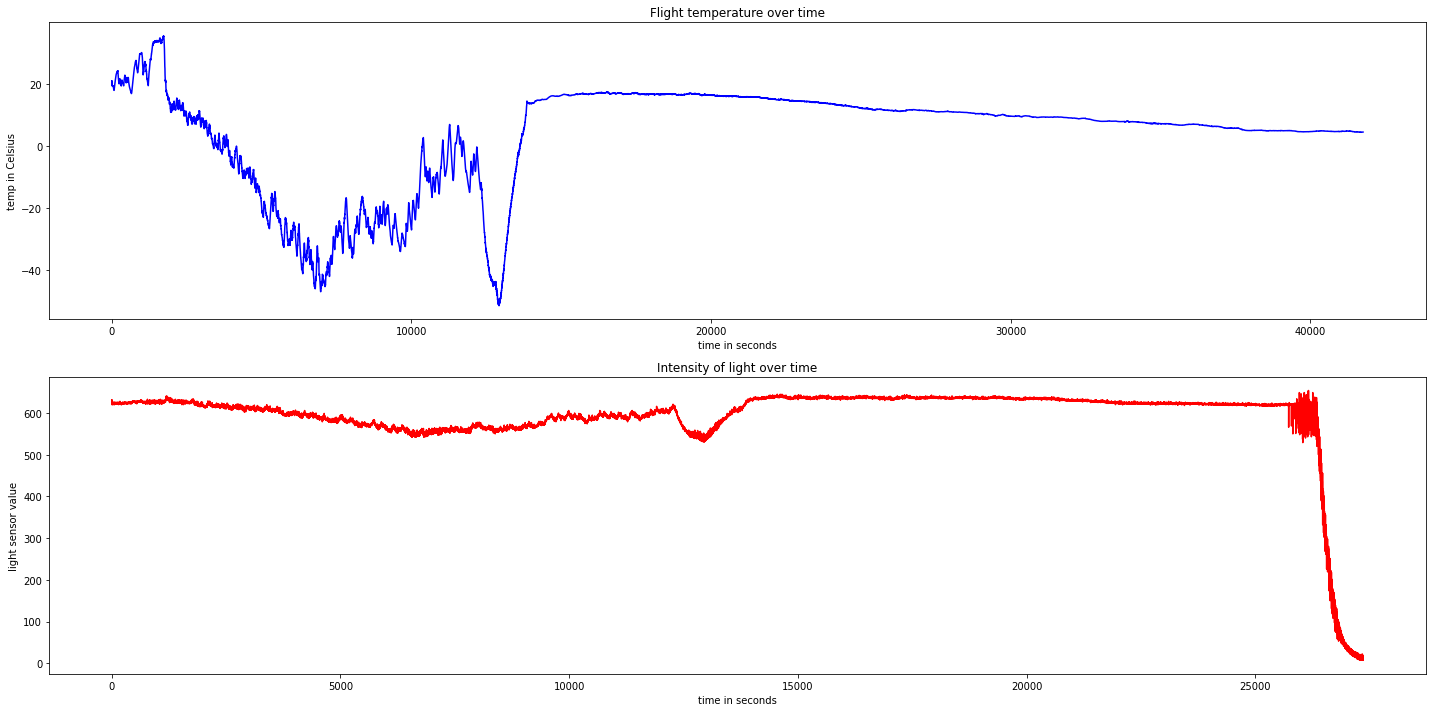

In [124]:
fig = plt.figure(figsize=(20,10))
tempplot = fig.add_subplot(2,1,1)
lightplot = fig.add_subplot(2,1,2)
sns.lineplot(x=temphumidity['time'], y = temphumidity['temperature_c'], ax = tempplot, color="blue")
sns.lineplot(x=light['time'], y = light['light_sensor'], ax = lightplot, color="red")
tempplot.set_ylabel("temp in Celsius")
tempplot.set_xlabel("time in seconds")
tempplot.set_title('Flight temperature over time')
lightplot.set_ylabel("light sensor value")
lightplot.set_xlabel("time in seconds")
lightplot.set_title('Intensity of light over time')
fig.tight_layout()

#####There doesn't seem to be much of a correlation between the light and temperature, but perhaps the slow drop in temperature at the 25000 second mark indicates nightfall, so the light intensity drops severely then?

#Plotting UV Data

In [126]:
uv = pd.read_csv('uv.csv')
uv['time'] = uv['time_ms']/1000
uv.head(5)

,time_ms,uv_sensor,time
0,167,62,0.167
1,998,61,0.998
2,1818,62,1.818
3,2639,61,2.639
4,3459,61,3.459


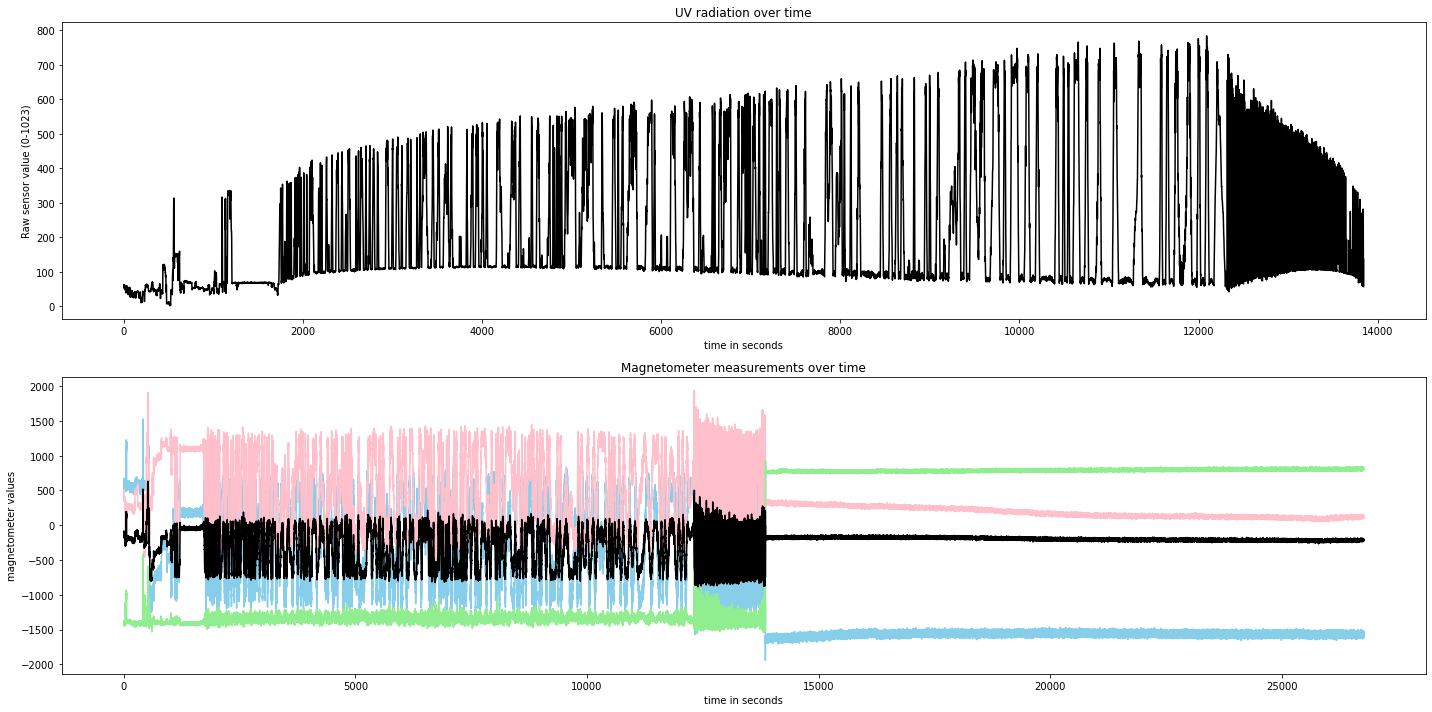

In [129]:
fig = plt.figure(figsize=(20,10))
uvplot = fig.add_subplot(2,1,1)
magplot = fig.add_subplot(2,1,2)
sns.lineplot(x=uv['time'], y = uv['uv_sensor'], ax = uvplot, color="black")
sns.lineplot(x=magnetometer['time'], y = magnetometer['X'], ax = magplot, color="skyblue")
sns.lineplot(x=magnetometer['time'], y = magnetometer['Y'], ax = magplot, color="pink")
sns.lineplot(x=magnetometer['time'], y = magnetometer['Z'], ax = magplot, color="lightgreen")
sns.lineplot(x=magnetometer['time'], y = (magnetometer['X']+magnetometer['Y']+magnetometer['Z'])/3, ax = magplot, color="black")
uvplot.set_ylabel("Raw sensor value (0-1023)")
uvplot.set_xlabel("time in seconds")
uvplot.set_title('UV radiation over time')
magplot.set_ylabel("magnetometer values")
magplot.set_xlabel("time in seconds")
magplot.set_title('Magnetometer measurements over time')
fig.tight_layout()

#####the UV data seems to fluctuate with the average of the magnetometer data

#Plotting load cell data

In [131]:
load = pd.read_csv('load_cell.csv')
load['time'] = load['time_ms']/1000
load.head(5)

,time,time_ms,load_g
0,2.147,2147,-0.10
1,3.010,3010,-0.22
2,3.809,3809,-0.70
3,4.607,4607,-0.92
4,5.405,5405,-1.09


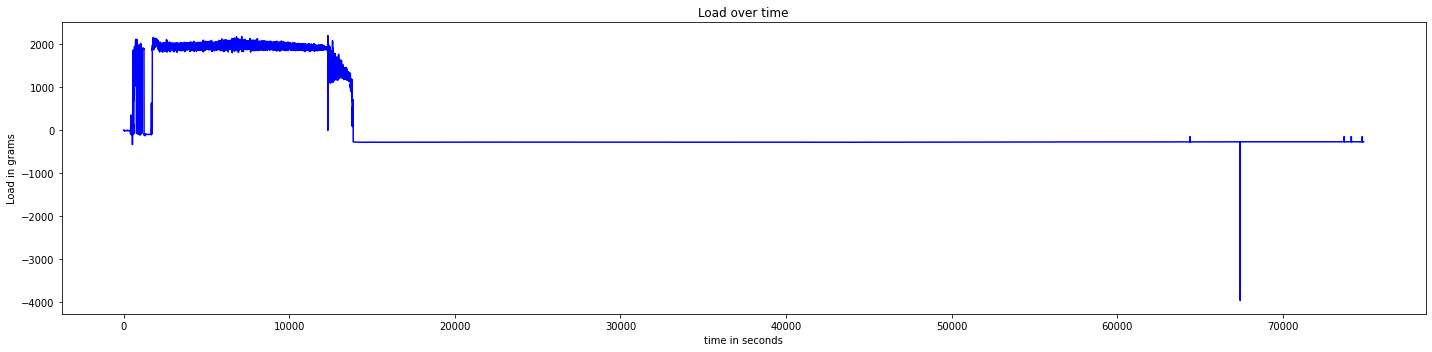

In [133]:
fig = plt.figure(figsize=(20,5))
loadplot = fig.add_subplot(1,1,1)
sns.lineplot(x=load['time'], y = load['load_g'], ax = loadplot, color="blue")
loadplot.set_ylabel("Load in grams")
loadplot.set_xlabel("time in seconds")
loadplot.set_title('Load over time')
fig.tight_layout()

#####The load drops off at around 14000 seconds, which matches the instance when descent begins. 

#####We could perhaps measure the air pressure in the balloon? 